In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import goodreads_api_client as gr

In [2]:
df = pd.read_csv('books.csv', on_bad_lines='skip')

In [3]:
df.index = df['bookID']
#change author for HP:
df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
highest_rated = df.sort_values('average_rating', ascending = False).head(10).set_index('title')
books = df['title'].value_counts()[:20]
raiting = df.average_rating[:20]

Text(0, 0.5, 'Books')

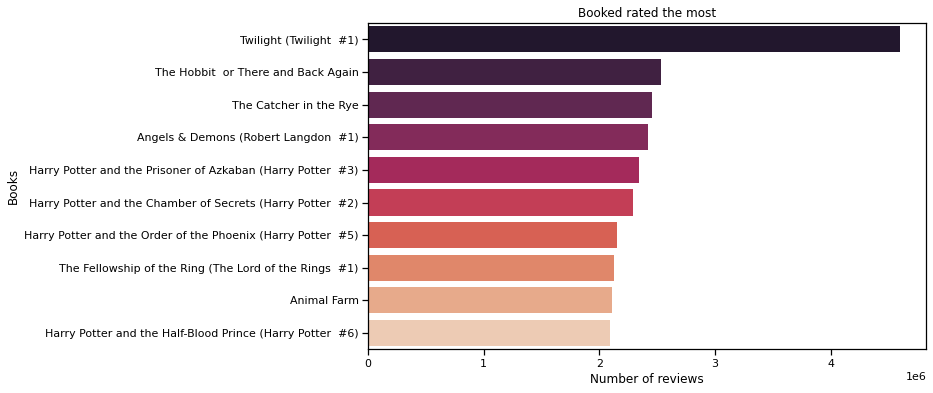

In [7]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='rocket')
plt.title('Booked rated the most')
plt.xlabel('Number of reviews')
plt.ylabel('Books')

In [8]:
#authors with most books reviewed

auth_books = df.groupby('authors').count().sort_values('title', ascending = False).head(10)['title'].reset_index().set_index('authors')

Text(0, 0.5, 'Name of Authors')

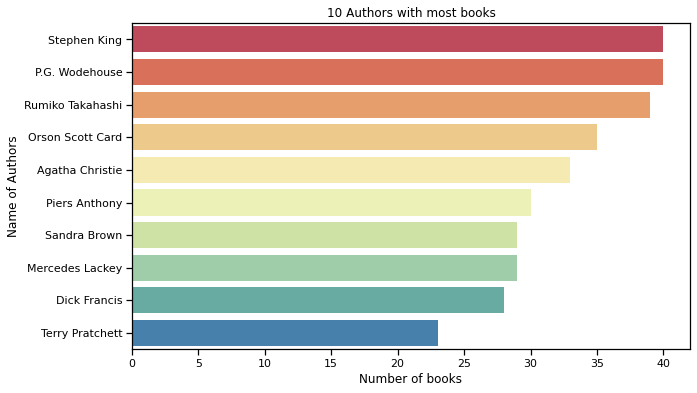

In [9]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.barplot(x=auth_books['title'], y=auth_books.index, palette='Spectral')
plt.title('10 Authors with most books')
plt.xlabel('Number of books')
plt.ylabel('Name of Authors')

In [10]:
# Language used the most by authors

most_lang = df.groupby('language_code').count().sort_values('title', ascending=False).head(10)['title'].reset_index().set_index('title')

In [12]:
most_lang

,language_code
title,
8908,eng
1408,en-US
218,spa
214,en-GB
144,fre
99,ger
46,jpn
19,mul
14,zho


In [37]:
authors = df['authors'].reset_index(drop=True)

In [38]:
authors.to_json(path_or_buf='./authors.json')

In [39]:
authors.head()

0    J.K. Rowling
1    J.K. Rowling
2    J.K. Rowling
3    J.K. Rowling
4    J.K. Rowling
Name: authors, dtype: object